In [5]:
import os
import glob
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")
import sklearn.metrics as metrics

In [6]:
import os

train_dir = '/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/train'
val_dir = '/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val'

def count_images_in_directory(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

train_images_count = count_images_in_directory(train_dir)
val_images_count = count_images_in_directory(val_dir)

print(f"Number of training images: {train_images_count}")
print(f"Number of validation images: {val_images_count}")


Number of training images: 8863
Number of validation images: 600


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for train and validation data
train_dir = '/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/train'
val_dir = '/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val'


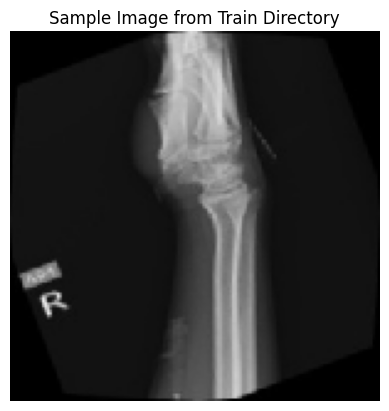

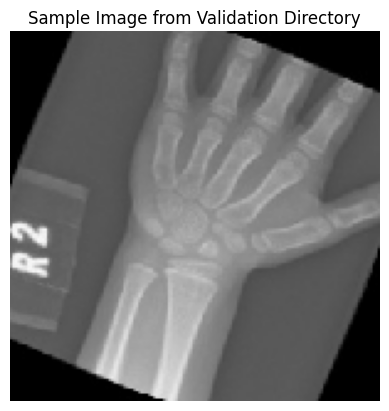

In [10]:
from tensorflow.keras.preprocessing import image
def plot_first_image(directory, title):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            img_path = os.path.join(root, filename)
            img = image.load_img(img_path, target_size=(150, 150))  # Assuming target size of (150, 150)
            plt.imshow(img)
            plt.title(title)
            plt.axis('off')
            plt.show()
            return  # Stop after plotting the first image

# Plot first image from train directory
plot_first_image(train_dir, 'Sample Image from Train Directory')

# Plot first image from validation directory
plot_first_image(val_dir, 'Sample Image from Validation Directory')

In [11]:

# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Create data generators with data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8863 images belonging to 2 classes.


In [12]:


# Create data generator for validation images
val_datagen = ImageDataGenerator(rescale=1./255)

# Load validation images from directory
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Found 600 images belonging to 2 classes.


In [ ]:


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


In [ ]:

# Evaluate the model
loss, acc_cnn = model.evaluate(val_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')


In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:

# Load pre-trained VGG16 model without including the top layers (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom top layers for bone fracture detection
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

acc_VGG16 = accuracy

In [20]:
from tensorflow.keras.applications import ResNet50

In [ ]:

# Load pre-trained ResNet50 model without including the top layers (fully connected layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom top layers for bone fracture detection
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

In [ ]:
# Evaluate the model on the validation set
loss, acc_resnet = model.evaluate(val_generator)
print(f'Validation accuracy: {acc_resnet * 100:.2f}%')


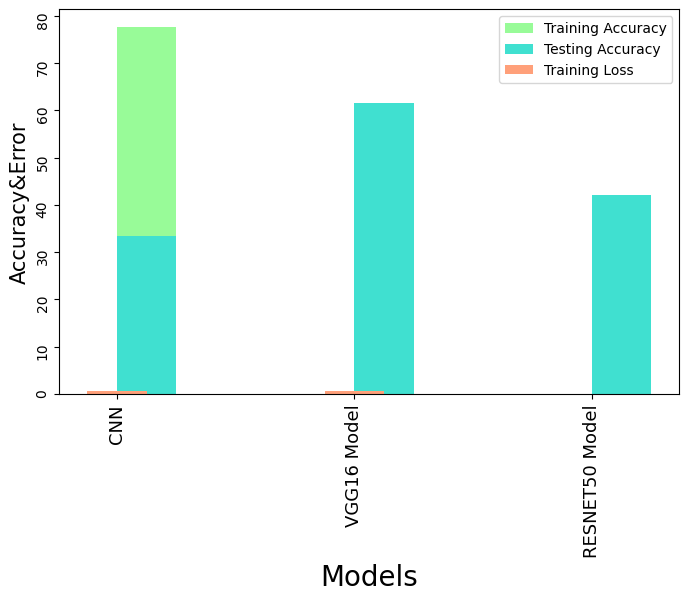

In [16]:
models=['CNN', 'VGG16 Model','RESNET50 Model']
ValuesTr=[77.52,60.62,42.07]
Valueste=[33.47,61.47,42.07]
Valuesms=[0.7104,0.6714,0.000]
ypos = np.arange(len(models))
#size of graph
plt.figure(figsize=(8, 5))
#angle of x ticks
plt.xticks(rotation=90, fontsize=13)
plt.yticks(rotation=90, fontsize=10)
# Plotting Training Accuracy
plt.bar(models, ValuesTr, width=0.25, align='edge', color='palegreen', label = "Training Accuracy")
# Plotting Trainng Accuracy
plt.bar(models, Valueste, width=0.25, align='edge', color='turquoise', label = "Testing Accuracy")
# Plotting Mean Square Error
plt.bar(models, Valuesms, width=0.25, color='lightsalmon', label="Training Loss")
plt.xlabel("Models", fontsize = 20)
plt.ylabel("Accuracy&Error", fontsize= 15, rotation= 90)
plt.legend()